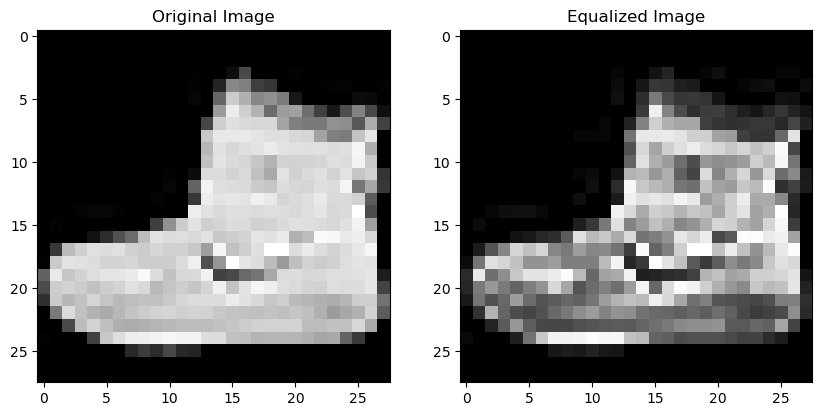

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(train_images, _), (_, _) = fashion_mnist.load_data()

# Choose an image from the dataset
image_index = 0  # Change this index to select a different image
image = train_images[image_index]

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()


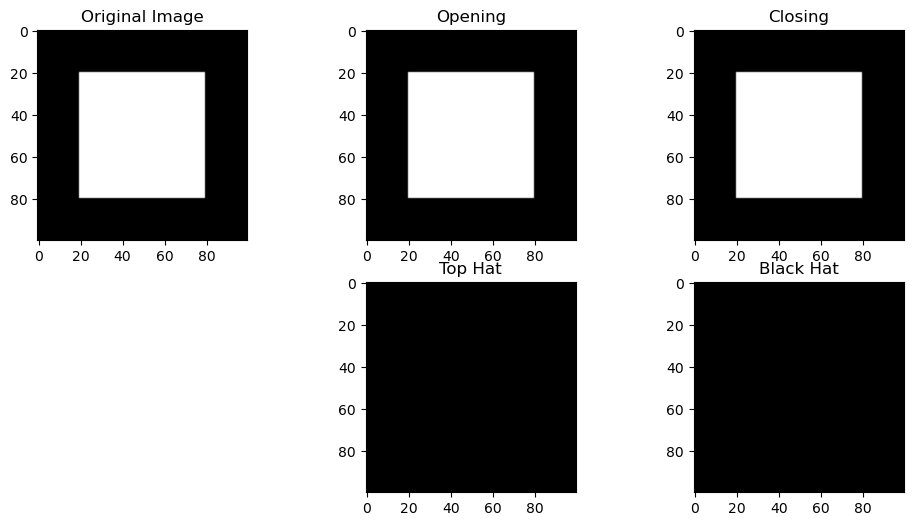

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a binary image (white foreground, black background)
binary_image = np.zeros((100, 100), dtype=np.uint8)
binary_image[20:80, 20:80] = 255  # Add a white square in the center

# Define the kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply morphological operations
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
top_hat = cv2.morphologyEx(binary_image, cv2.MORPH_TOPHAT, kernel)
black_hat = cv2.morphologyEx(binary_image, cv2.MORPH_BLACKHAT, kernel)

# Display the original and transformed images
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(opening, cmap='gray')
plt.title('Opening')

plt.subplot(2, 3, 3)
plt.imshow(closing, cmap='gray')
plt.title('Closing')

plt.subplot(2, 3, 5)
plt.imshow(top_hat, cmap='gray')
plt.title('Top Hat')

plt.subplot(2, 3, 6)
plt.imshow(black_hat, cmap='gray')
plt.title('Black Hat')

plt.show()

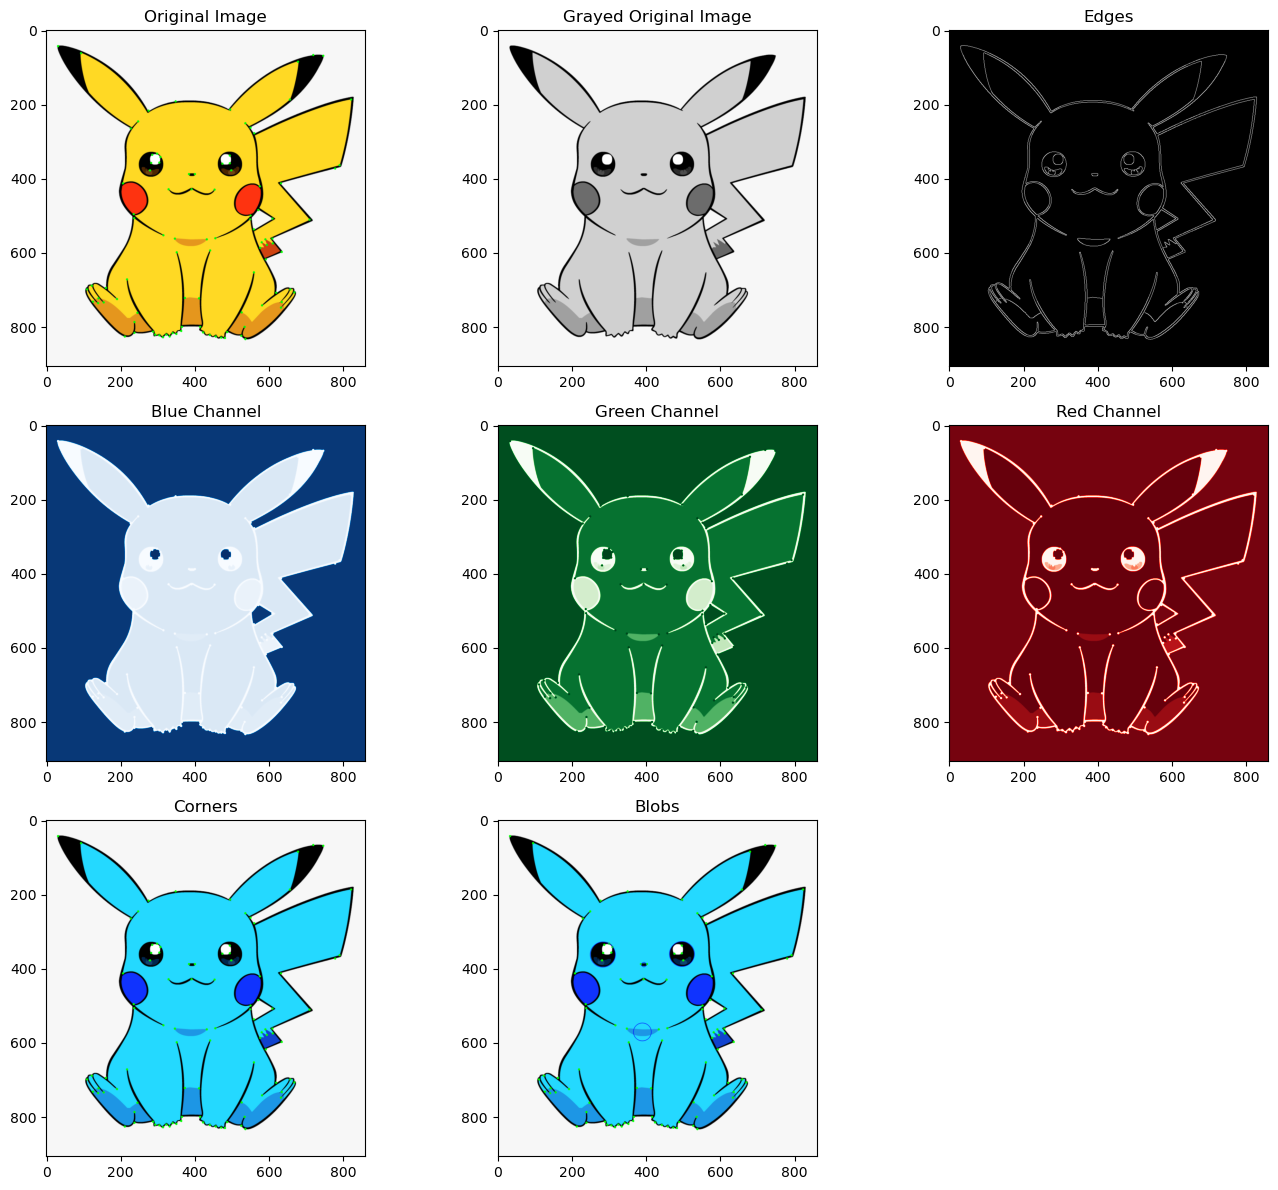

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('resources/pikachu.png', cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract RGB channels
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# Corner Detection
corners = cv2.goodFeaturesToTrack(gray_image, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.intp(corners)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x, y), 3, (0, 255, 0), -1)

# Edge Detection
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

# Blob Detection
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 10
params.maxThreshold = 200
params.filterByArea = True
params.minArea = 100
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray_image)
blobs = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the results
plt.figure(figsize=(14, 12))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(3, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayed Original Image')

plt.subplot(3, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edges')

plt.subplot(3, 3, 4)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')

plt.subplot(3, 3, 5)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')

plt.subplot(3, 3, 6)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')

plt.subplot(3, 3, 7)
plt.imshow(image, cmap='gray')
plt.title('Corners')

plt.subplot(3, 3, 8)
plt.imshow(blobs, cmap='gray')
plt.title('Blobs')

plt.tight_layout()
plt.show()


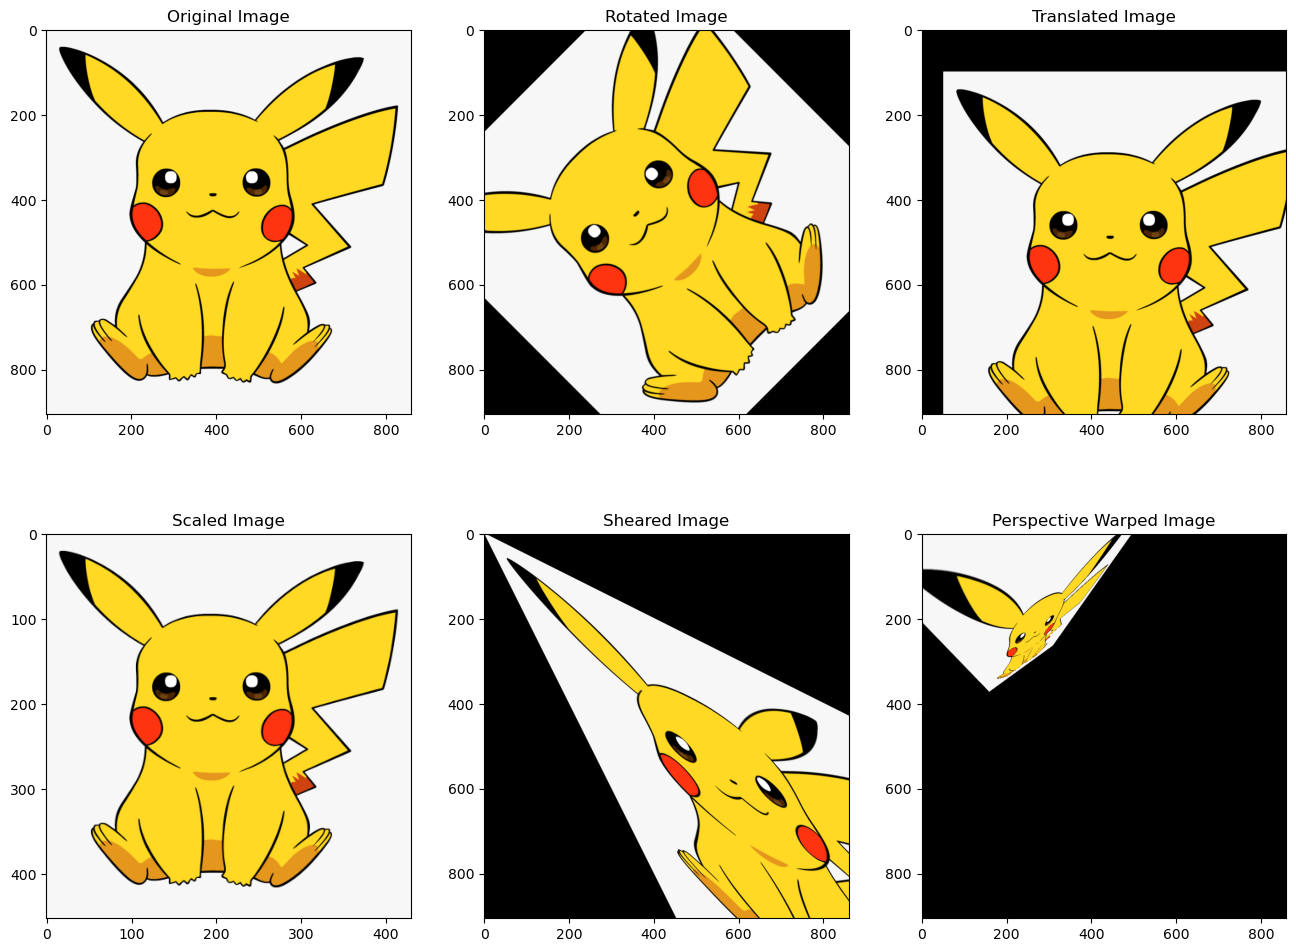

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('resources/pikachu.png')

# Define the transformations parameters
rows, cols, _ = image.shape
center = (cols // 2, rows // 2)

# Rotation
angle = 45
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

# Translation
tx, ty = 50, 100
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))

# Scaling
scaling_factor = 0.5
scaled_image = cv2.resize(image, None, fx=scaling_factor, fy=scaling_factor)

# Skewing
shear_matrix = np.float32([[1, 0.5, 0], [0.5, 1, 0]])
sheared_image = cv2.warpAffine(image, shear_matrix, (cols, rows))

# Perspective warping
pts1 = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250], [200, 200]])
perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
perspective_warped_image = cv2.warpPerspective(image, perspective_matrix, (cols, rows))

# Display the results
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title('Translated Image')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(sheared_image, cv2.COLOR_BGR2RGB))
plt.title('Sheared Image')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(perspective_warped_image, cv2.COLOR_BGR2RGB))
plt.title('Perspective Warped Image')

plt.show()


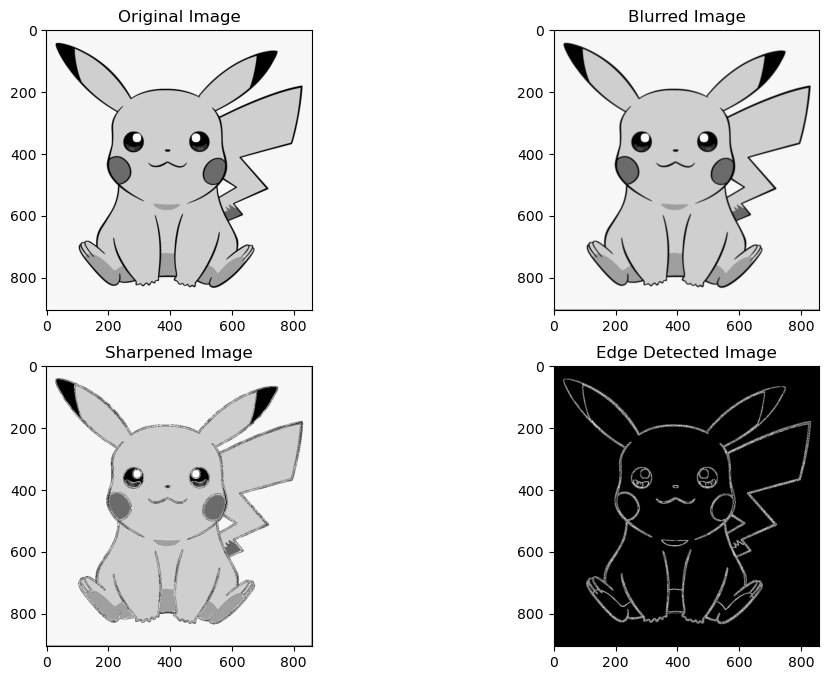

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('resources/pikachu.png', cv2.IMREAD_GRAYSCALE)

# Define convolution kernels
blur_kernel = np.ones((3, 3), dtype=np.float32) / 9.0  # Averaging kernel for blurring
sharpen_kernel = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]], dtype=np.float32)  # Kernel for sharpening
edge_kernel = np.array([[-1, -1, -1],
                         [-1, 8, -1],
                         [-1, -1, -1]], dtype=np.float32)  # Kernel for edge detection

# Function to perform convolution
def convolution(image, kernel):
    # Get kernel size
    kernel_height, kernel_width = kernel.shape

    # Get image size
    image_height, image_width = image.shape

    # Create a new image to store the result
    result_image = np.zeros_like(image)

    # Perform convolution
    for y in range(image_height - kernel_height + 1):
        for x in range(image_width - kernel_width + 1):
            # Extract the region of interest from the image
            roi = image[y:y + kernel_height, x:x + kernel_width]

            # Perform element-wise multiplication with the kernel and sum the results
            conv_result = np.sum(roi * kernel)

            # Assign the result to the corresponding pixel in the result image
            result_image[y + kernel_height // 2, x + kernel_width // 2] = conv_result

    return result_image

# Apply convolution with different kernels
blurred_image = convolution(image, blur_kernel)
sharpened_image = convolution(image, sharpen_kernel)
edge_detected_image = convolution(image, edge_kernel)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')

plt.subplot(2, 2, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')

plt.subplot(2, 2, 4)
plt.imshow(edge_detected_image, cmap='gray')
plt.title('Edge Detected Image')

plt.show()


In [ ]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from io import BytesIO

# URL of the image
url = "https://opengameart.org/sites/default/files/rabbit_normal_0.png"

# Fetch the image data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Read the image data
    image_data = response.content

    # Convert image data to a NumPy array
    image = Image.open(BytesIO(image_data)).convert('L')  # Convert to grayscale
    input_image = np.array(image).astype(np.float32)
    input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension
    input_image = np.expand_dims(input_image, axis=-1)  # Add channel dimension

    # Function to visualize convolutional layer output
    def visualize_conv_output(filters, kernel_size, stride, padding):
        # Define the convolutional layer
        conv_layer = tf.keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=stride, padding=padding)

        # Apply convolution to the input image
        conv_output = conv_layer(input_image)

        # Get the output image data
        output_image = conv_output.numpy().squeeze()

        # Get number of channels
        num_channels = output_image.shape[-1]

        # Display each channel separately
        plt.figure(figsize=(16, 6))
        for i in range(num_channels):
            plt.subplot(1, num_channels, i+1)
            plt.imshow(output_image[:, :, i], cmap='gray')
            plt.title(f'Channel {i+1}')
            plt.axis('off')
        plt.show()

    # Visualize convolutional layer output for different configurations
    visualize_conv_output(filters=3, kernel_size=(3, 3), stride=(1, 1), padding='SAME')
    visualize_conv_output(filters=3, kernel_size=(3, 3), stride=(2, 2), padding='SAME')
    visualize_conv_output(filters=3, kernel_size=(3, 3), stride=(1, 1), padding='VALID')
    visualize_conv_output(filters=6, kernel_size=(5, 5), stride=(1, 1), padding='VALID')

else:
    print("Failed to fetch the image.")
